<a href="https://colab.research.google.com/github/zingarelli/7DaysOfCode-HTML_CSS/blob/main/Semana-2/Alura_Challenges_%7C_Data_Science_2022_Semana_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de *Churn Rate* | Alura Voz

Este notebook é uma [continuação do trabalho feito anteriormente](https://github.com/zingarelli/alura-challenges-data-science-2022/tree/main/Semana-1), cujo objetivo é auxiliar a empresa Alura Voz a reduzir o *Churn Rate* de clientes, isto é, a taxa de evasão de clientes (aqueles que cancelam o plano de Telefone/Internet/Vídeo).

## Resumo da Semana 1

No primeiro projeto, foi feito o tratamento da base de dados fornecida pela Alura Voz, que contém informações sobre seus clientes e os tipos de planos e valores de suas assinaturas, dentre outros dados relevantes. A [base está disponível online](https://github.com/sthemonica/alura-voz/blob/main/Dados/Telco-Customer-Churn.json), bem como o [dicionário de dados](https://github.com/sthemonica/alura-voz/blob/main/dicionario.md) que contém uma breve explicação de cada coluna que compõe a base. 

Houve também uma adaptação das colunas e conteúdo da base para o português (anteriormente estavam em inglês), bem como a criação de uma nova coluna, trazendo informação sobre o gasto diário aproximado de cada cliente.

Devido a todo o tratamento feito nos dados, nesta segunda etapa do projeto será trabalhado um [arquivo CSV](https://raw.githubusercontent.com/zingarelli/alura-challenges-data-science-2022/main/Semana-1/analise_semana_1.csv) que contém a base já limpa e formatada. 

## Semana 2 - Visualizações
O foco nesta semana é analisar graficamente os dados, com foco maior na variável Churn (que agora se chama "cancelou_plano"). Procurar encontrar relações e tendências entre as variáveis, bem como explorar a distribuição dos dados para tentar, visualmente, encontrar perfis de clientes que optaram sair do plano.

Para encontrar estas relações, vou tentar assumir algumas suposições. Não vou, no entanto, fazer teste de hipóteses ou abordagens do tipo, por não ter conhecimento nessa parte.

# Configurações iniciais

Importação das bibliotecas necessárias e alteração em configurações do Colab para melhor visualização das saídas

In [1]:
import pandas as pd

# import para as bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns 
# utilizando a biblioteca Plotly, como indicada pela empresa
import plotly.express as px

pd.set_option('display.max_columns', 22)

# Carregamento da Base de Dados

A base de dados será carregada de um arquivo CSV, com os dados já tratados e formatados.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/zingarelli/alura-challenges-data-science-2022/main/Semana-1/analise_semana_1.csv')
df.head()

,cliente_ID,cancelou_plano,genero,maior_65_anos,possui_companheiro_companheira,possui_dependentes,meses_contrato,assina_telefone,multiplas_linhas_telefonicas,tipo_assinatura_internet,adicional_seguranca_online,adicional_backup_online,adicional_protecao_dispositivo,adicional_suporte_VIP,assina_TV_cabo,assina_streaming_filmes,plano_contratado,fatura_online,forma_pagamento,gasto_diario,gasto_mensal,gasto_total
0,0002-ORFBO,Nao,Mulher,0,Sim,Sim,9,Sim,Nao,Cabo,Nao,Sim,Nao,Sim,Sim,Nao,Um ano,Sim,Cheque por Correio,2.19,65.6,593.30
1,0003-MKNFE,Nao,Homem,0,Nao,Nao,9,Sim,Sim,Cabo,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Nao,Cheque por Correio,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Homem,0,Nao,Nao,4,Sim,Nao,Fibra,Nao,Nao,Sim,Nao,Nao,Nao,Mensal,Sim,Cheque eletronico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Homem,1,Sim,Nao,13,Sim,Nao,Fibra,Nao,Sim,Sim,Nao,Sim,Sim,Mensal,Sim,Cheque eletronico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Mulher,1,Sim,Nao,3,Sim,Nao,Fibra,Nao,Nao,Nao,Sim,Sim,Nao,Mensal,Sim,Cheque por Correio,2.80,83.9,267.40


In [3]:
# algumas informações básicas da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cliente_ID                      7043 non-null   object 
 1   cancelou_plano                  7043 non-null   object 
 2   genero                          7043 non-null   object 
 3   maior_65_anos                   7043 non-null   int64  
 4   possui_companheiro_companheira  7043 non-null   object 
 5   possui_dependentes              7043 non-null   object 
 6   meses_contrato                  7043 non-null   int64  
 7   assina_telefone                 7043 non-null   object 
 8   multiplas_linhas_telefonicas    7043 non-null   object 
 9   tipo_assinatura_internet        7043 non-null   object 
 10  adicional_seguranca_online      7043 non-null   object 
 11  adicional_backup_online         7043 non-null   object 
 12  adicional_protecao_dispositivo  70

# Análise da variável `cancelou_plano` (Churn)

Na adaptação para o português, esta a variável `Churn` foi renomeada para `cancelou_plano`. Ela é uma variável categórica e dicotômica, contendo somente respostas Sim e Nao.

Esta variável é nosso *target*, é aquilo que a Alura Voz busca reduzir. Futuramente no projeto, a intenção é verificar quais outras variáveis podem influenciar na intenção de um cliente cancelar ou não o plano.

In [4]:
# armazenando os dados em uma variável chamada churn
churn = df['cancelou_plano']

churn.value_counts()

Nao    5174
Sim    1869
Name: cancelou_plano, dtype: int64

In [5]:
# separando entre clientes que estão ativos e aqueles que cancelaram o plano (former_customer)
# lembrando que o "Sim" significa que o cliente cancelou o plano
active_customer = (churn == 'Nao').sum()
former_customer = (churn == 'Sim').sum()

print(f'Planos ativos: {active_customer}, {round(active_customer/len(churn)*100, 2)}% do total')
print(f'Planos cancelados: {former_customer}, {round(former_customer/len(churn)*100, 2)}% do total')

Planos ativos: 5174, 73.46% do total
Planos cancelados: 1869, 26.54% do total


Pouco mais de um quarto da base de clientes cancelou o plano. 

Por carregar somente dois valores, podemos utilizar `churn` em um gráfico de pizza para facilitar a visualização das proporções.

([<matplotlib.patches.Wedge at 0x7f71ab48a250>,
 [Text(-0.8144539368428058, -0.7393678277834755, 'Planos ativos'),
  Text(0.8144540060674139, 0.7393677515287918, 'Planos Cancelados')])

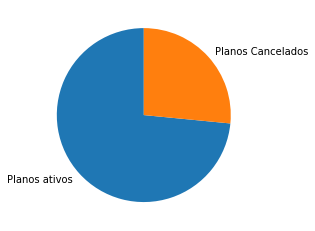

In [6]:
# utilizando o pyplot, startangle=90 faz com que a divisão comece a partir das 12h (imaginando um relógio)
plt.pie(
    churn.value_counts(), 
    labels=['Planos ativos', 'Planos Cancelados'], 
    startangle=90,
)

# Churn e relacionamento com outras variáveis

Irei verificar graficamente se há algum tipo de relação do churn com as outras variáveis da base. Por exemplo, comparar churn com os valores mensais e totais gastos por cada cliente, e verificar se há alguma relação ou tendência entre essas variáveis.

Uma suposição minha é que um dos motivos para clientes cancelarem o plano seja o preço, então esse será o primeiro objeto de análise. 

Outra suposição é que a quantidade de meses de contrato também pode influenciar a decisão por encerrar o plano (por exemplo, clientes com contrato de longa data podem possuir alguma afinidade/fidelidade ao plano e optar por mantê-lo). 

Novamente, são apenas suposições para guiar a visualização dos dados. Não irei fazer nada estatisticamente formal para testá-las.

## Churn X Gastos

Irei utilizar a biblioteca Seaborn para criar um gráfico de dispersão (scatterplot) categórico, comparando os gastos totais de cada cliente, divididos entre os que cancelaram o plano ou não. Minha intenção é observar se há uma concentração de clientes que cancelaram o plano dentro de algum intervalo de gastos.

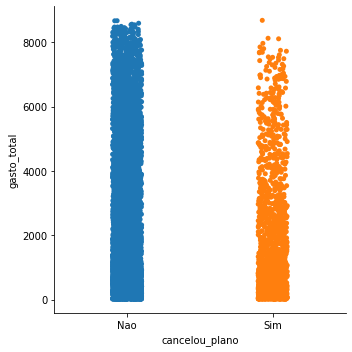

In [7]:
# o catplot possibilita cruzar dados categóricos com numéricos por meio de 
# diferentes gráficos de dispersão. O padrão é o stripplot 
sns.catplot(x='cancelou_plano', y='gasto_total', data=df)

O gasto total não pareceu ser uma boa escolha, pois ele é muito abrangente. Cada cliente tem um gasto total diferente, baseado no numero de meses com o plano e nas diferente opções de "extras" que podem ser adicionados ao plano. 

Irei então fazer a comparação com os gastos mensais.

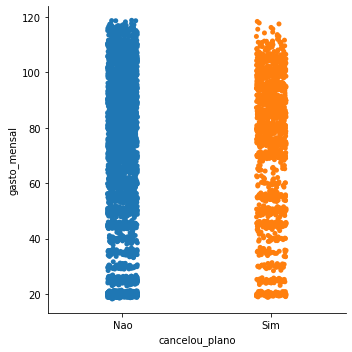

In [8]:
sns.catplot(x='cancelou_plano', y='gasto_mensal', data=df)

Comparando com os gastos mensais, a visualização no gráfico parece ser mais relevante. É possível observar que, dentre os clientes que cancelaram o plano, há uma concentração na faixa dos que pagam entre 70 e 110 dólares (ou reais? Não sei).

Podemos alterar o tipo de representação gráfica para `violin`, que auxilia a visualizar melhor onde os dados estão mais concentrados.

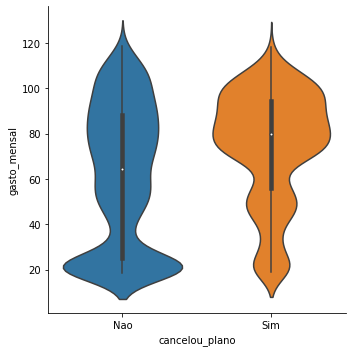

In [9]:
# kind é o parâmetro que altera entre as diferentes opções de scatterplot
sns.catplot(x='cancelou_plano', y='gasto_mensal', kind='violin', data=df)

Visualmente, é possível ver também uma grande concentração de planos com mensalidades mais baixas dentre aqueles que estão com o plano ativo.

### Churn X Mensalidade X Gênero
Vou adicionar uma terceira variável para verificar se o comportamento é parecido para homens e mulheres

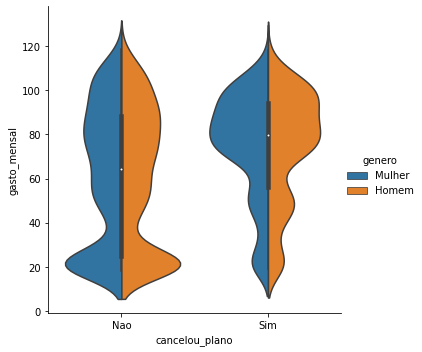

In [10]:
# hue irá atribuir uma cor diferente para homens e mulheres
# split irá manter ambos os gêneros dentro de um mesmo violino, facilitando a comparação
sns.catplot(x='cancelou_plano', y='gasto_mensal', hue='genero', kind='violin', split=True, data=df)

Graficamente, é possível visualizar que, dentre os clientes que cancelaram seu plano, a quantidade de mulheres é maior, especialmente na faixa dos planos mensais entre 70 e 90 dólares.

É possível também observar algo interessante entre os que não cancelaram o plano: a distribuição por gênero parece ser muito semelhante, independente da faixa de gastos mensais.

### Churn X Mensalidade X Idade
Posso também verificar como se distribuem as pessoas maiores de 65 dentro dessa comparação entre mensalidade e churn.

No projeto anterior, optei por manter os valores da variável `maior_65_anos` sem alteração (e talvez agora comece a me arrepender...). Ela possui os valores 0 e 1, sendo que 1 significa que o cliente tem idade igual ou maior que 65 anos, e 0 caso contrário.

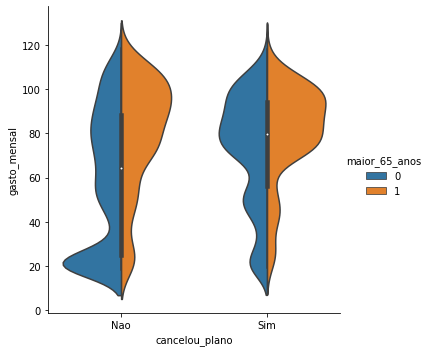

In [11]:
# TO DO: alterar a legenda via seaborn/matplotlib
sns.catplot(x='cancelou_plano', y='gasto_mensal', hue='maior_65_anos', kind='violin', split=True, data=df)

Nesta comparação, é possível verificar que há uma concentração maior de clientes que cancelaram o plano e que possuem idade igual ou maior que 65 anos, dentro da faixa dos que pagam entre 70 e 100 dólares mensais.

É interessante também notar que, dentre os que possuem planos ativos e gastam mensalmente em média 20 dólares, há uma grande concentração de pessoas abaixo de 65 anos. Isso vai se invertendo conforme o gasto mensal com o plano vai aumentando. Infelizmente, a base de dados não possui informações mais estratificadas da idade para poder analisar esse fenômeno mais a fundo. Eu chutaria que os que pagam menos sejam os mais jovens, que talvez possuem menos recursos financeiros. 

### **Conclusão**
Graficamente, parece que os clientes que **cancelaram** seus planos tinham gastos mensais na faixa de **70 a 110 dólares**, com uma concentração ligeiramente maior por volta de 80 dólares. Dentro dessa faixa, há uma quantidade maior de clientes **mulheres** e uma concentração relevante de pessoas com **idade maior ou igual a 65 anos**.

## Churn X Fidelidade
Nesta seção, irei comparar o churn rate com a quantidade de meses que o contrato do cliente está ativo, que eu vou denominar "fidelidade". Vou verificar se visualmente é possível observar alguma tendência ou padrão de perda de clientes baseado no tempo de fidelidade.

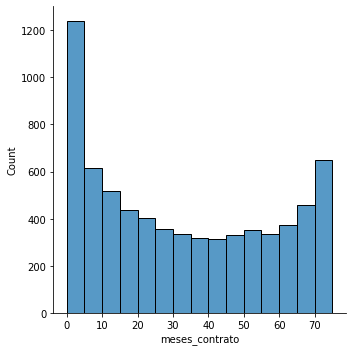

In [64]:
# visualizando a base de clientes por meses de contrato ativo (histograma)
# binwidth controla o intervalo de meses considerado para agrupar os valores
# no caso, conta a frequência de 5 a 5 meses
sns.displot(data=df, x='meses_contrato', binwidth=5)

Neste primeiro gráfico, de histograma da quantidade de clientes por meses de contrato, já é possível observar dois fatos interessantes: 

1. Existe uma quantidade muito grande de clientes novos (0-5 meses);
2. Existe uma quantidade também muito grande de clientes antigos (mais de 5 anos de contrato), o que pode indicar uma alta fidelidade à empresa ou seu plano de voz/internet.

In [92]:
# verificando a quantidade de clientes mais novos e mais antigos
total_customers = len(df)
total_customers_5_months = len(df[df['meses_contrato'] <= 5])
total_customers_5_years = len(df[df['meses_contrato'] > 60])

# calculando a proporção de clientes
perc_customers_5_months = round(total_customers_5_months/total_customers*100, 2)
perc_customers_5_years = round(total_customers_5_years/total_customers*100, 2)

print(f'Total de clientes: {total_customers}')
print(f'Total de clientes novos (0 a 5 meses): {total_customers_5_months}, {perc_customers_5_months}%')
print(f'Total de clientes fiéis (acima 5 anos): {total_customers_5_years}, {perc_customers_5_years}%')

Total de clientes: 7043
Total de clientes novos (0 a 5 meses): 1371, 19.47%
Total de clientes fiéis (acima 5 anos): 1407, 19.98%


Baseado neste histograma, irei verificar como  fica a distribuição do churn para comparar as duas variáveis (churn e fidelidade)

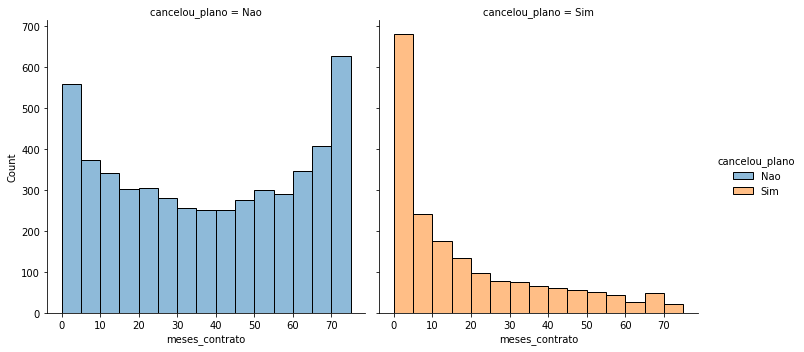

In [109]:
# col possibilita a divisão dos dados de "cancelou_plano", plotando gráficos
# distintos para cada valor ("Sim" ou "Nao")
sns.displot(data=df, binwidth=5, x='meses_contrato', col='cancelou_plano', hue='cancelou_plano')

Separando a fidelidade de clientes entre os que não cancelaram o plano e os que cancelaram o plano, é possível notar visualmente um dado muito importante: a maior quantidade de **clientes que estão cancelando o plano é formada por clientes novos**, sendo que um número muito considerável é formado por clientes de 0-5 meses de contrato.

**Acima de 5 meses**, a quantidade de cancelamentos é bem **menor** e segue uma **curva decrescente**, à exceção de clientes entre 65 e 70 meses de contrato, que possui um leve crescimento. 

Outra forma de verificar visualmente a quantidade de clientes que cancelou ou não o plano, baseado na quantidade de meses de contrato, é plotar as duas informações em um mesmo gráfico. No gráfico a seguir, os meses estão no eixo y, que acredito facilite a visualização e comparação das proporções.

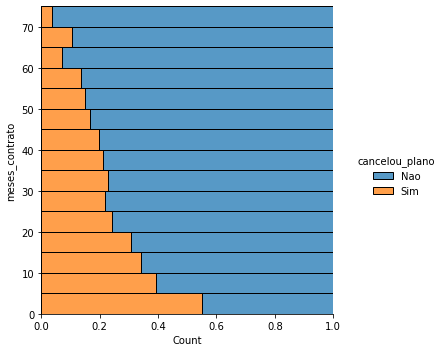

In [81]:
# multiple='fill' preenche 100% do gráfico e mostra a proporção ocupada
# pelas duas categorias de "cancelou_plano"
sns.displot(data=df, binwidth=5, y='meses_contrato', hue='cancelou_plano', multiple='fill')

Agora é possível visualizar que **mais da metade** das pessoas que possuem **até 5 meses** de contrato **cancelaram o plano**. 

In [101]:
# calculando a proporção de clientes com até 5 meses de contrato que cancelaram ou não o plano
churn_5_months = df[df['meses_contrato'] <= 5]['cancelou_plano']
perc_churn_5_months_yes = round((churn_5_months == 'Sim').sum() / churn_5_months.count()*100, 2)
perc_churn_5_months_no = round((churn_5_months == 'Nao').sum() / churn_5_months.count()*100, 2)

print(f'{perc_churn_5_months_yes}% do clientes com até 5 meses de contrato cancelaram o plano.')
print(f'{perc_churn_5_months_no}% do clientes com até 5 meses de contrato mantiveram o plano.')

54.27% do clientes com até 5 meses de contrato cancelaram o plano
45.73% do clientes com até 5 meses de contrato mantiveram o plano


Por fim, irei visualizar a proporção de clientes que cancelaram ou não o plano, para contratos de até 5 meses, separando mês a mês.

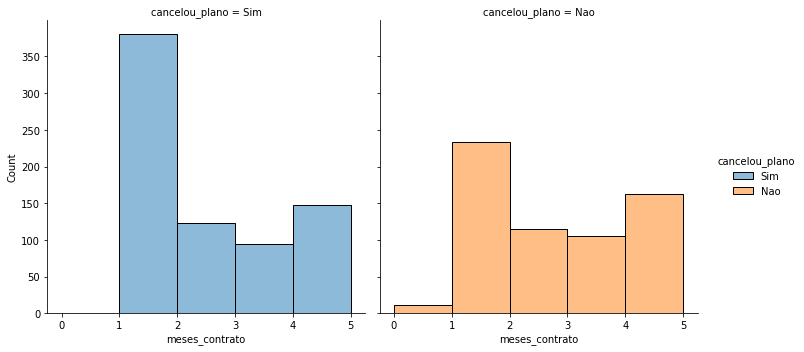

In [110]:
sns.displot(
    data=df[df['meses_contrato'] <= 5], 
    binwidth=1, 
    x='meses_contrato', 
    col='cancelou_plano', 
    hue='cancelou_plano')

É possível ver que a maior parte dos cancelamentos acontecem logo após o primeiro mês de contrato. 

***Será que a empresa oferece algum tipo de "degustação" de um mês?*** Isso talvez explicasse por que tantos clientes cancelam o plano após o primeiro mês (que seria o "mês grátis"). É apenas uma suposição, a ser verificada com a empresa.

### Conclusão

Graficamente, é possível observar que a maior parte dos **cancelamentos** está **concentrada em clientes novos**, com até 5 meses de contrato, e que grande parte está cancelando o plano **logo após o primeiro mês** de contrato.

# TO DO

Outros relacionamentos gráficos para considerar futuramente.

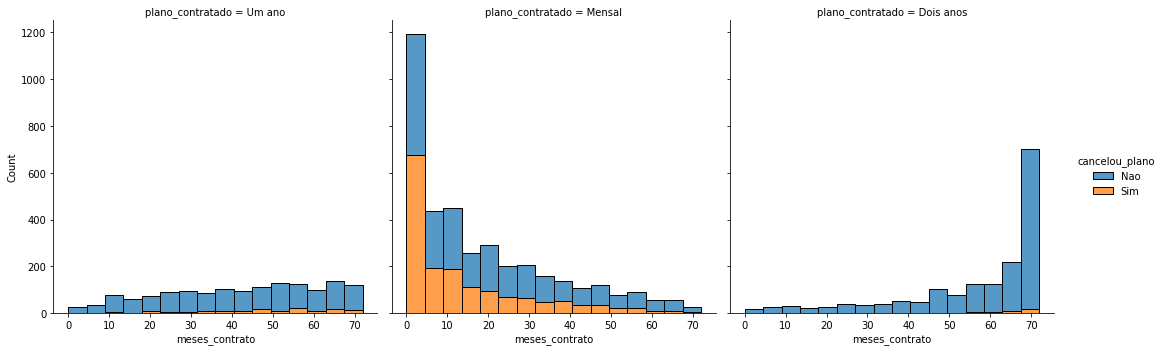

In [15]:
sns.displot(data=df, x='meses_contrato', hue='cancelou_plano', multiple='stack', col='plano_contratado')

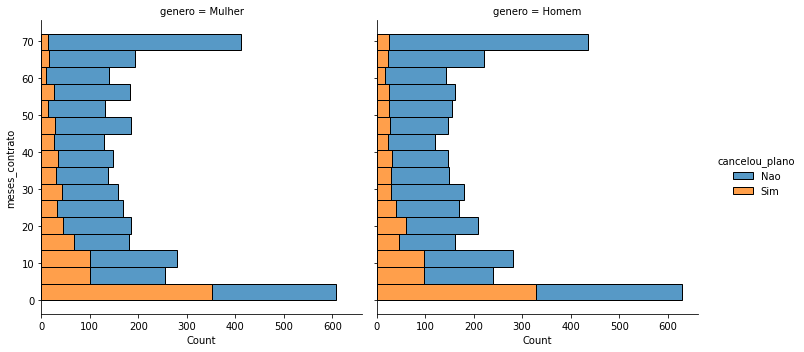

In [16]:
sns.displot(data=df, y='meses_contrato', hue='cancelou_plano', multiple='stack', col='genero')

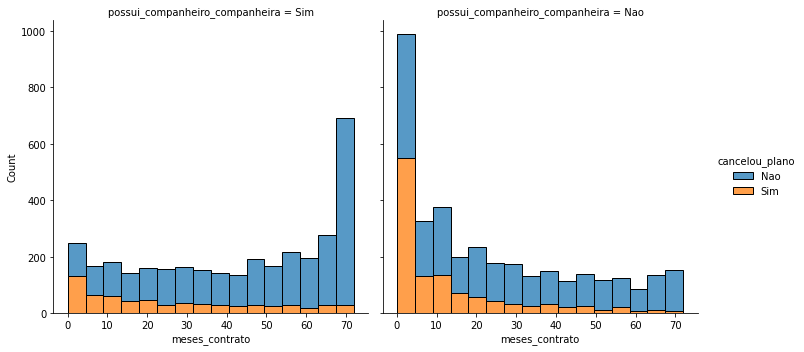

In [17]:
sns.displot(data=df, x='meses_contrato', hue='cancelou_plano', multiple='stack', col='possui_companheiro_companheira')


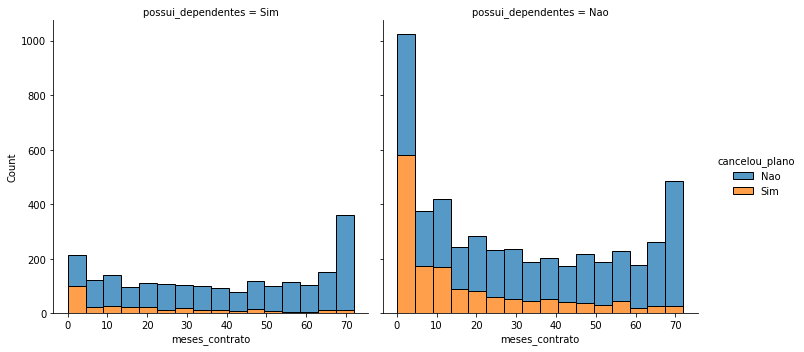

In [18]:
sns.displot(data=df, x='meses_contrato', hue='cancelou_plano', multiple='stack', col='possui_dependentes')

# TO DO


1. Dar nomes aos gráficos
2. Analisar Correlação
3. Utilizar o Plotly para gráficos diferentes e interativos
4. Verificar relacionamento entre variáveis, sem necessariamente incluir o churn.

